In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [0]:
import tensorflow_datasets as tfds
import json

In [0]:
imdb,info = tfds.load("imdb_reviews",with_info = True, as_supervised=True)

In [0]:
train_data = imdb['train']
test_data = imdb['test']

training_sentences=[]
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
vocab_size = 10000
embedding_dim = 16
oov_tok ="<OOV>"
max_length = 100
trunc_type = "post"
pad_type = "post"


In [0]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences,maxlen = max_length, padding = "post", truncating=trunc_type)

testing_seq = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seq,maxlen = max_length, padding = "post", truncating=trunc_type)
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 174,529
Trainable params: 174,529
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 10
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded,testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 13s 517us/sample - loss: 0.5171 - accuracy: 0.7227 - val_loss: 0.4104 - val_accuracy: 0.8106
Epoch 2/10
25000/25000 [==============================] - 13s 515us/sample - loss: 0.3128 - accuracy: 0.8688 - val_loss: 0.4188 - val_accuracy: 0.8103
Epoch 3/10
25000/25000 [==============================] - 13s 507us/sample - loss: 0.1994 - accuracy: 0.9242 - val_loss: 0.4676 - val_accuracy: 0.8080
Epoch 4/10
25000/25000 [==============================] - 13s 504us/sample - loss: 0.1092 - accuracy: 0.9634 - val_loss: 0.5995 - val_accuracy: 0.8029
Epoch 5/10
25000/25000 [==============================] - 13s 515us/sample - loss: 0.0476 - accuracy: 0.9874 - val_loss: 0.7573 - val_accuracy: 0.7972
Epoch 6/10
25000/25000 [==============================] - 13s 502us/sample - loss: 0.0161 - accuracy: 0.9971 - val_loss: 0.9068 - val_accuracy: 0.7978
Epoch 7/10
25000/25000 [====================

In [0]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

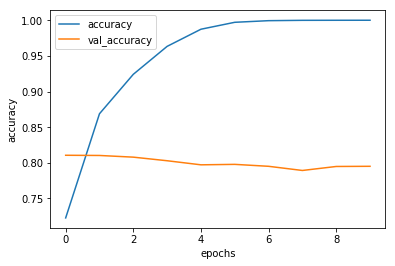

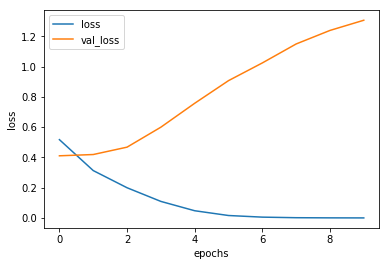

In [17]:
plot_graph(history,'accuracy')
plot_graph(history,'loss')